In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv(r'C:\Users\devan\Desktop\CODING\Diwali_Shirt_Dataset.csv')
print(df.head())

   CustomerID CustomerName  Gender  Age Marital_Status           State  \
0        2270   Customer_4  Female   47        Married           Bihar   
1        2106   Customer_5    Male   36         Single     Maharashtra   
2        2020   Customer_8    Male   45        Married  Madhya Pradesh   
3        2458  Customer_14  Female   29         Single     Maharashtra   
4        2087  Customer_15  Female   18         Single           Bihar   

      City  Occupation Product_Name  Price  Quantity_Sold  Discount(%)  \
0    Patna  Healthcare        Shirt   3259              3           21   
1   Mumbai          IT        Shirt   3383              3           16   
2   Mumbai  Healthcare        Shirt   2862              4            5   
3  Lucknow     Student        Shirt    663              2           20   
4    Patna     Student        Shirt   2668              2            4   

   PaymentMode        Date  Total_Amount       Profit  
0  Credit Card  2024-11-02       7723.83  1640.331184 

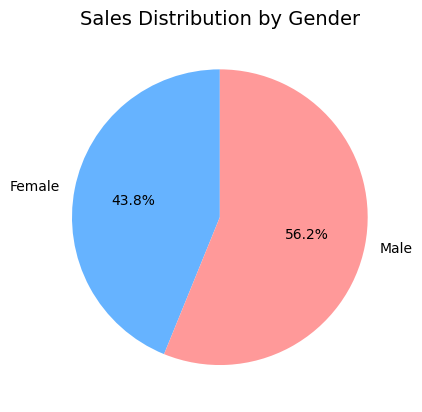

In [12]:
# Sales by Gender
gender_sales = df.groupby('Gender')['Total_Amount'].sum()

gender_sales.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66b3ff', '#ff9999']
)
plt.title("Sales Distribution by Gender", fontsize=14)
plt.ylabel("")
plt.show()


C:\Users\devan\AppData\Local\Temp\ipykernel_16968\851108050.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales, x='State', y='Total_Amount', palette='magma')


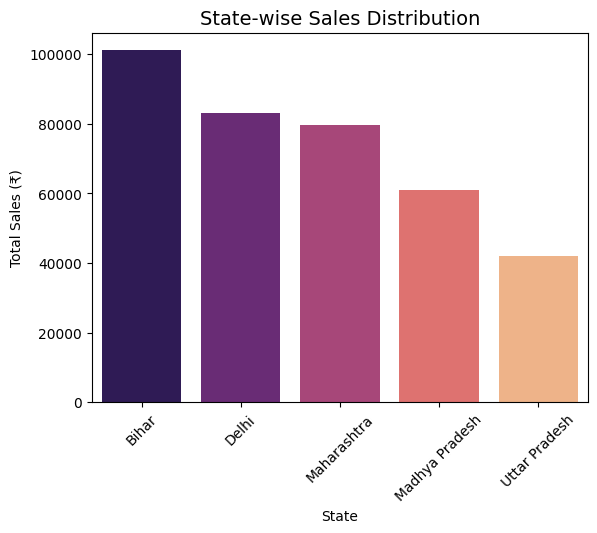

In [8]:
# State-wise Sales
state_sales = df.groupby('State', as_index=False)['Total_Amount'].sum().sort_values(by='Total_Amount', ascending=False)

sns.barplot(data=state_sales, x='State', y='Total_Amount', palette='magma')
plt.title("State-wise Sales Distribution", fontsize=14)
plt.xlabel("State")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.show()



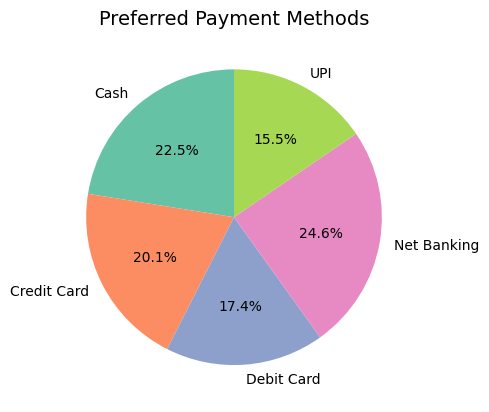

In [14]:
# Payment Mode Analysis
payment_sales = df.groupby('PaymentMode')['Total_Amount'].sum()

payment_sales.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2")
)
plt.title("Preferred Payment Methods", fontsize=14)
plt.ylabel("")
plt.show()


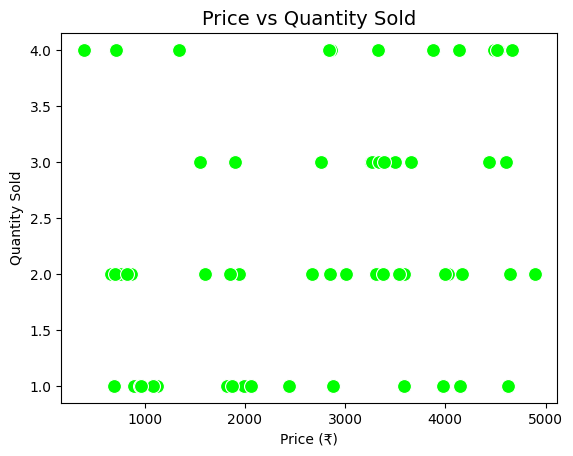

In [15]:
# Price vs Quantity Sold
sns.scatterplot(data=df, x='Price', y='Quantity_Sold', color='lime', s=100)
plt.title("Price vs Quantity Sold", fontsize=14)
plt.xlabel("Price (₹)")
plt.ylabel("Quantity Sold")
plt.show()


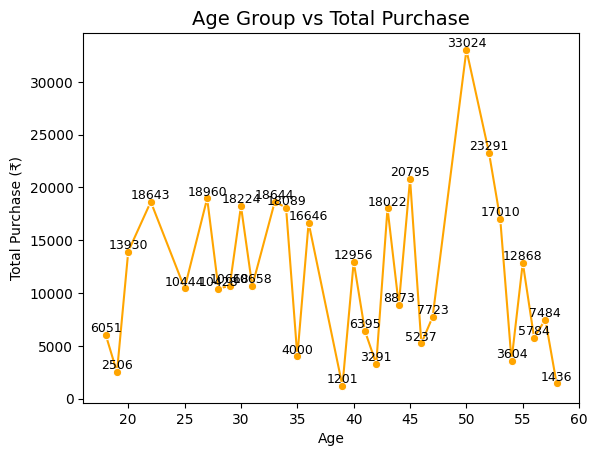

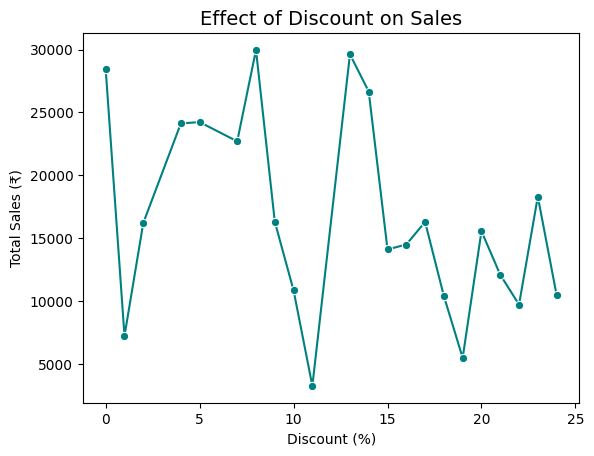

In [9]:
# Discount vs Sales
discount_sales = df.groupby('Discount(%)', as_index=False)['Total_Amount'].sum()

sns.lineplot(data=discount_sales, x='Discount(%)', y='Total_Amount', marker='o', color='teal')

plt.title("Effect of Discount on Sales", fontsize=14)
plt.xlabel("Discount (%)")
plt.ylabel("Total Sales (₹)")
plt.show()


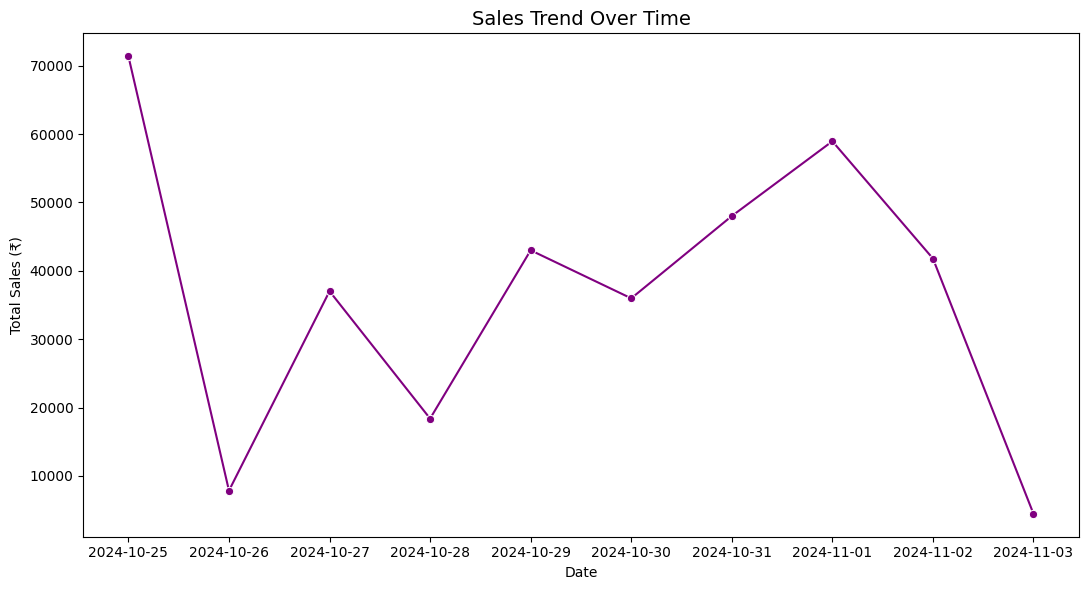

In [7]:
# Sales Over Time
df['Date'] = pd.to_datetime(df['Date'])
date_sales = df.groupby('Date', as_index=False)['Total_Amount'].sum()
plt.figure(figsize = (11,6))
sns.lineplot(data=date_sales, x='Date', y='Total_Amount', marker='o', color='purple')
plt.title("Sales Trend Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Sales (₹)")
plt.tight_layout()
plt.show()


C:\Users\devan\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


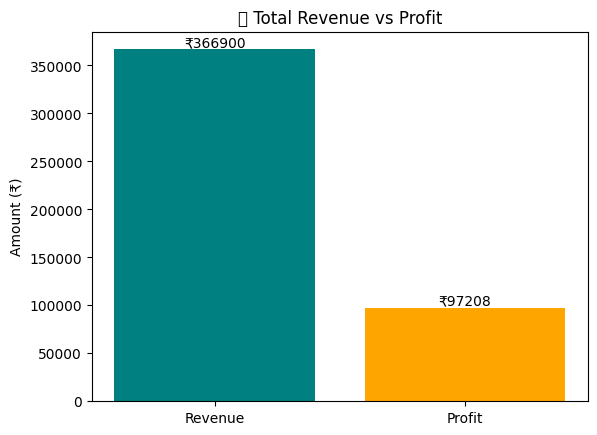

In [ ]:
#Calculate total revenue and profit

revenue = df['Total_Amount'].sum()
profit = df['Profit'].sum()

fig, ax = plt.subplots()

bars = ax.bar(['Revenue', 'Profit'], [revenue, profit], color=['teal', 'orange'])

ax.bar_label(bars, fmt='₹%.0f', fontsize=10)

plt.title('💰 Total Revenue vs Profit')
plt.ylabel('Amount (₹)')
plt.show()



Sales on Diwali: 41803.76
Sales on Dhanteras: 48018.85


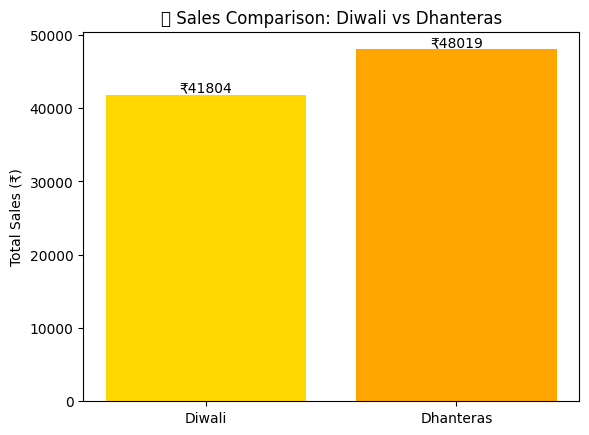

In [ ]:

diwali_date = '2024-11-02'
dhanteras_date = '2024-10-31'

# Calculate total sales for both dates
sales_diwali = df[df['Date'] == diwali_date]['Total_Amount'].sum()
sales_dhanteras = df[df['Date'] == dhanteras_date]['Total_Amount'].sum()

# Check if data exists
print("Sales on Diwali:", sales_diwali)
print("Sales on Dhanteras:", sales_dhanteras)

# Plot only if there’s data
fig, ax = plt.subplots()
bars = ax.bar(['Diwali', 'Dhanteras'], [sales_diwali, sales_dhanteras], color=['gold', 'orange'])
ax.bar_label(bars, fmt='₹%.0f')
plt.title('   Sales Comparison: Diwali vs Dhanteras')
plt.ylabel('Total Sales (₹)')
plt.show()
